# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']};D:\\downloads"
    
# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),  
    transforms.Resize(64)
])

# Create training set and define training dataloader
training_data = torchvision.datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

# Create a temporary dataset and dataloader for a function that plots images without any transformations
temp_data = torchvision.datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

temp_dataloader = torch.utils.data.DataLoader(temp_data, batch_size=64, shuffle=True)

In [4]:
# Calculate the shape of the images
shape = next(iter(training_data))[0][0].shape 

In [5]:
# Calculate mean and standard deviation after applying transformations
sum_data = 0
sum_squared_data = 0

for images, _ in train_dataloader:
    sum_data += images.sum()
    sum_squared_data += (images ** 2).sum()
  
count = len(training_data) * shape[0] * shape[1]    

mean = sum_data / count

std = torch.sqrt((sum_squared_data / count) - (mean ** 2))

print(f'Mean: {mean.item():.4f}')
print(f'Standard Deviation: {std.item():.4f}')

Mean: -0.0001
Standard Deviation: 0.9383


In [6]:
print(f'Size of the training data = {len(training_data)}')

print(f'Size of the testing data = {len(test_data)}')

print(f'Shape of the image = {shape[0], shape[1]}')

Size of the training data = 60000
Size of the testing data = 10000
Shape of the image = (64, 64)


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

9


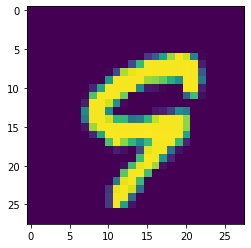

4


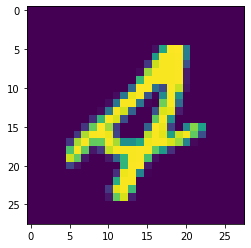

3


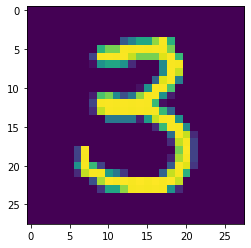

5


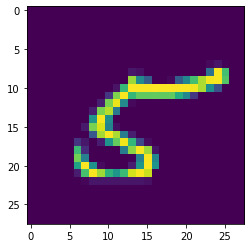

7


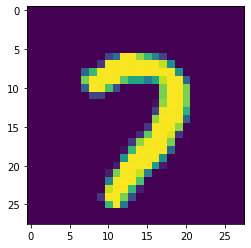

In [8]:
# Explore data
show5(temp_dataloader)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

# Answer
<ul>
    <li>We need to convert our data to tensors before using it in the neural network.</li>
    <li>Normalize tensors to have a mean of 0 and standard deviation of 1, respectively.</li>
    <li>The image may not be obvious, so I upscale it to ensure clarity.</li>
</ul>

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
# Create my own neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.middle_activation = F.relu
        self.final_activation  = F.softmax
        self.Layer1 = nn.Linear(64 * 64 * 1, 300)
        self.Layer2 = nn.Linear(300, 100)
        self.Layer3 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.middle_activation(self.Layer1(x))
        x = self.middle_activation(self.Layer2(x))
        x = self.final_activation(self.Layer3(x))
        return x

In [10]:
# Determine if the device should be GPU if available, otherwise CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [11]:
# Instantiate a model from our neural network
model = NeuralNetwork()
model = model.to(device)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [12]:
# Instantiate the optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr = .001)
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [13]:
# Create Early Stopping class
class EarlyStopping:
    def __init__(self, patience=5, diff=0):
        self.diff       = diff
        self.counter    = 0
        self.patience   = patience
        self.best_loss  = None
        self.early_stop = False

    def early_stopping(self, validation_loss):
        if self.best_loss is None:
            self.best_loss = validation_loss
        
        elif validation_loss < self.best_loss - self.diff:
            self.best_loss = validation_loss
            self.counter = 0
        
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

In [14]:
# Training and calculating training loss, validation loss, training accuracy, and testing loss
early_stopping = EarlyStopping(patience=5, diff=.00001)

num_of_epochs  = 200
stopping_epoch = 0

training_loss     = []
training_accuracy = []

validation_loss     = [] 
validation_accuracy = []

for epoch in range(num_of_epochs):
    model.train()
    
    total_correct = 0
    total_samples = 0
    
    total_training_loss = 0
    
    total_validation_loss = 0
    
    for batch in train_dataloader:
        inputs, labels = batch
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = model(inputs)
        loss    = criterion(outputs, labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        
        total_training_loss += loss.item()
        
    average_training_loss = total_training_loss / total_samples
    training_accuracy_epoch = 100 * total_correct / total_samples
    
    training_loss.append(average_training_loss)
    training_accuracy.append(training_accuracy_epoch)
    
    total_correct = 0
    total_samples = 0
    
    print(f'Epoch {epoch+1}: average training loss = {average_training_loss:.7f} Accuracy = {training_accuracy_epoch:.2f}%')
    
    model.eval()
    
    with torch.no_grad():

        for batch in test_dataloader:
            inputs, labels = batch

            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss    = criterion(outputs, labels)

            _, predicted = torch.max(outputs, 1)

            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            
            total_validation_loss += loss.item()

    average_validation_loss = total_validation_loss / total_samples
    validation_accuracy_epoch = 100 * total_correct / total_samples

    validation_loss.append(average_validation_loss)
    validation_accuracy.append(validation_accuracy_epoch)

    print(f'Epoch {epoch+1}: average validation loss = {average_validation_loss:.7f} Accuracy = {validation_accuracy_epoch:.2f}%')
    print("================================================================================================")
    
    early_stopping.early_stopping(average_validation_loss)
    if early_stopping.early_stop:
        stopping_epoch = epoch+1
        print(f"Early stopping at epoch {stopping_epoch}")
        print("================================================================================================")
        break

/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Epoch 1: average training loss = 0.0359197 Accuracy = 20.62%
Epoch 1: average validation loss = 0.0359623 Accuracy = 31.68%
Epoch 2: average training loss = 0.0356582 Accuracy = 35.70%
Epoch 2: average validation loss = 0.0355820 Accuracy = 38.50%
Epoch 3: average training loss = 0.0350103 Accuracy = 39.02%
Epoch 3: average validation loss = 0.0345792 Accuracy = 39.13%
Epoch 4: average training loss = 0.0338005 Accuracy = 43.90%
Epoch 4: average validation loss = 0.0331626 Accuracy = 51.32%
Epoch 5: average training loss = 0.0321518 Accuracy = 62.24%
Epoch 5: average validation loss = 0.0311208 Accuracy = 68.95%
Epoch 6: average training loss = 0.0300171 Accuracy = 70.49%
Epoch 6: average validation loss = 0.0291774 Accuracy = 72.29%
Epoch 7: average training loss = 0.0286636 Accuracy = 72.17%
Epoch 7: average validation loss = 0.0282985 Accuracy = 73.43%
Epoch 8: average training loss = 0.0280236 Accuracy = 73.14%
Epoch 8: average validation loss = 0.0278183 Accuracy = 74.16%
Epoch 9:

Plot the training loss (and validation loss/accuracy, if recorded).

In [15]:
# Create a list of epochs we iterated over
epochs = [epoch for epoch in range(1, stopping_epoch + 1)]

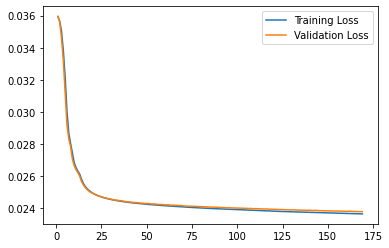

In [16]:
# Plot the Validation loss and Training loss
plt.plot(epochs, training_loss, label = "Training Loss")
plt.plot(epochs, validation_loss, label = "Validation Loss")
plt.legend()
plt.show()

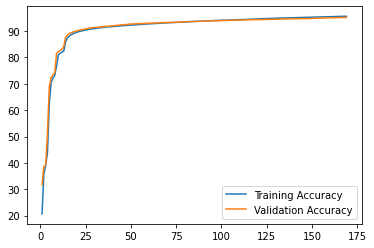

In [17]:
# Plot the Validation loss and Training loss
plt.plot(epochs, training_accuracy, label = "Training Accuracy")
plt.plot(epochs, validation_accuracy, label = "Validation Accuracy")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [18]:
# Calculate the final model accuracy and loss
total_correct = 0
total_samples = 0

total_testing_loss = 0

model.eval()

with torch.no_grad():

    for batch in test_dataloader:
        inputs, labels = batch

        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        loss    = criterion(outputs, labels)

        _, predicted = torch.max(outputs, 1)

        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        total_testing_loss += loss.item()

average_testing_loss = total_testing_loss / total_samples
testing_accuracy     = 100 * total_correct / total_samples

print(f'average testing loss = {average_testing_loss:.7f} Accuracy = {testing_accuracy:.2f}%')

/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


average testing loss = 0.0237601 Accuracy = 95.21%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [19]:
# Instantiate a model from our neural network
final_model = NeuralNetwork()
final_model = final_model.to(device)

In [20]:
# Instantiate the optimizer and loss function
final_optimizer = optim.SGD(final_model.parameters(), lr=0.001, momentum=0.9)

In [21]:
# Training and calculating training loss, validation loss, training accuracy, and testing loss

early_stopping = EarlyStopping(patience=5, diff=0.00001)

num_of_epochs  = 200
stopping_epoch = 0

training_loss     = []
training_accuracy = []

validation_loss     = [] 
validation_accuracy = []

for epoch in range(num_of_epochs):
    final_model.train()
    
    total_correct = 0
    total_samples = 0
    
    total_training_loss = 0
    
    total_validation_loss = 0
    
    for batch in train_dataloader:
        inputs, labels = batch
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        outputs = final_model(inputs)
        loss = criterion(outputs, labels)
        
        final_optimizer.zero_grad()
        
        loss.backward()
        final_optimizer.step()
        
        _, predicted = torch.max(outputs, 1)
        
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        
        total_training_loss += loss.item()
        
    average_training_loss = total_training_loss / total_samples
    training_accuracy_epoch = 100 * total_correct / total_samples
    
    training_loss.append(average_training_loss)
    training_accuracy.append(training_accuracy_epoch)
    
    total_correct = 0
    total_samples = 0
    
    print(f'Epoch {epoch+1}: average training loss = {average_training_loss:.7f} Accuracy = {training_accuracy_epoch:.2f}%')
    
    final_model.eval()
    
    with torch.no_grad():

        for batch in test_dataloader:
            inputs, labels = batch

            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = final_model(inputs)
            loss = criterion(outputs, labels)

            _, predicted = torch.max(outputs, 1)

            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            
            total_validation_loss += loss.item()

    average_validation_loss = total_validation_loss / total_samples
    validation_accuracy_epoch = 100 * total_correct / total_samples

    validation_loss.append(average_validation_loss)
    validation_accuracy.append(validation_accuracy_epoch)

    print(f'Epoch {epoch+1}: average validation loss = {average_validation_loss:.7f} Accuracy = {validation_accuracy_epoch:.2f}%')
    print("================================================================================================")
    
    early_stopping.early_stopping(average_validation_loss)
    if early_stopping.early_stop:
        stopping_epoch = epoch + 1
        print(f"Early stopping at epoch {stopping_epoch}")
        print("================================================================================================")
        break

/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Epoch 1: average training loss = 0.0319219 Accuracy = 54.06%
Epoch 1: average validation loss = 0.0277524 Accuracy = 73.89%
Epoch 2: average training loss = 0.0271622 Accuracy = 74.64%
Epoch 2: average validation loss = 0.0269923 Accuracy = 75.36%
Epoch 3: average training loss = 0.0265470 Accuracy = 77.82%
Epoch 3: average validation loss = 0.0260948 Accuracy = 81.78%
Epoch 4: average training loss = 0.0253851 Accuracy = 85.81%
Epoch 4: average validation loss = 0.0246817 Accuracy = 90.81%
Epoch 5: average training loss = 0.0244998 Accuracy = 90.97%
Epoch 5: average validation loss = 0.0244172 Accuracy = 91.90%
Epoch 6: average training loss = 0.0243082 Accuracy = 91.86%
Epoch 6: average validation loss = 0.0242845 Accuracy = 92.53%
Epoch 7: average training loss = 0.0241907 Accuracy = 92.42%
Epoch 7: average validation loss = 0.0241874 Accuracy = 92.90%
Epoch 8: average training loss = 0.0241036 Accuracy = 92.91%
Epoch 8: average validation loss = 0.0241404 Accuracy = 93.24%
Epoch 9:

In [22]:
# Create a list of epochs we iterated over
epochs = [epoch for epoch in range(1, stopping_epoch + 1)]

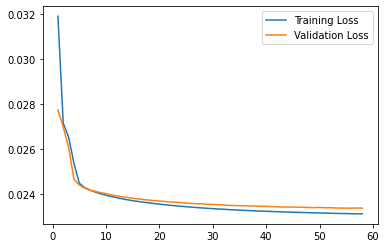

In [23]:
# Plot the Validation loss and Training loss
plt.plot(epochs, training_loss, label = "Training Loss")
plt.plot(epochs, validation_loss, label = "Validation Loss")
plt.legend()
plt.show()

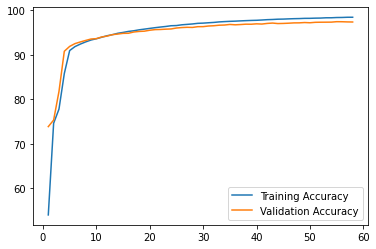

In [24]:
# Plot the Validation loss and Training loss
plt.plot(epochs, training_accuracy, label = "Training Accuracy")
plt.plot(epochs, validation_accuracy, label = "Validation Accuracy")
plt.legend()
plt.show()

In [25]:
# Calculate the final model accuracy and loss
total_correct = 0
total_samples = 0

total_testing_loss = 0

final_model.eval()

with torch.no_grad():

    for batch in test_dataloader:
        inputs, labels = batch

        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = final_model(inputs)
        loss    = criterion(outputs, labels)

        _, predicted = torch.max(outputs, 1)

        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        total_testing_loss += loss.item()

average_testing_loss = total_testing_loss / total_samples
testing_accuracy     = 100 * total_correct / total_samples

print(f'average testing loss = {average_testing_loss:.7f} Accuracy = {testing_accuracy:.2f}%')

/root/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


average testing loss = 0.0233940 Accuracy = 97.38%


## Saving your model
Using `torch.save`, save your model for future loading.

In [26]:
# Save the best model
PATH = "best_model.pth"

torch.save(final_model.state_dict(), PATH)